# Exercise 7
## Linear Equalisation and MLSE at BPSK transmission

In [1]:
import numpy as np
import scipy.signal as sig
import scipy.linalg as lin
import matplotlib.pyplot as plt
%matplotlib inline

YOUR_CODE_HERE = None

bpsk_map = np.array([-1, 1])

### Task 1 - Linear Equaliser
#### a) Generate a receive signal by convolving with the channel impusle response and addition of white Gaussian noise, following $r[n] = h_c[n] \ast s[n] + z[n]$.

The channel impulse response is $h_c(t) = -0.8 \delta(t) + 0.3\delta(t-T) + 0.5 \delta(t-2T) - 0.1 \delta(t-3T)$ with SNR = 8 dB.

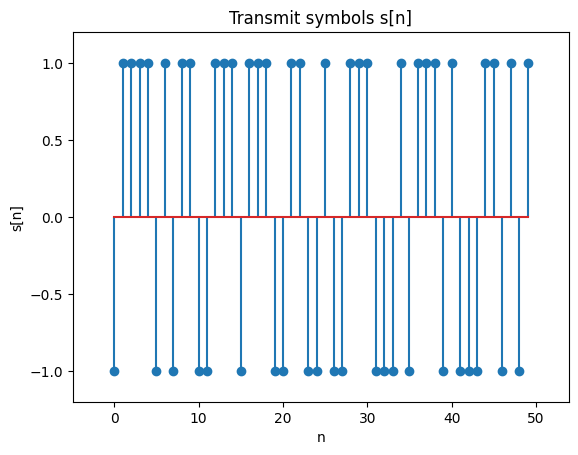

In [3]:
def generate_random_BPSK_symbols(nsym):
    random_indices = np.random.randint(low=0, high=2, size=nsym)
    return bpsk_map[random_indices]

# generate random transmit symbols
nsym = 1000  # number of symbols
s = generate_random_BPSK_symbols(nsym)

nsym_plot = 50
plt.stem(s[:nsym_plot]); plt.margins(0.1);
plt.xlabel('n'); plt.ylabel('s[n]'); plt.title('Transmit symbols s[n]');

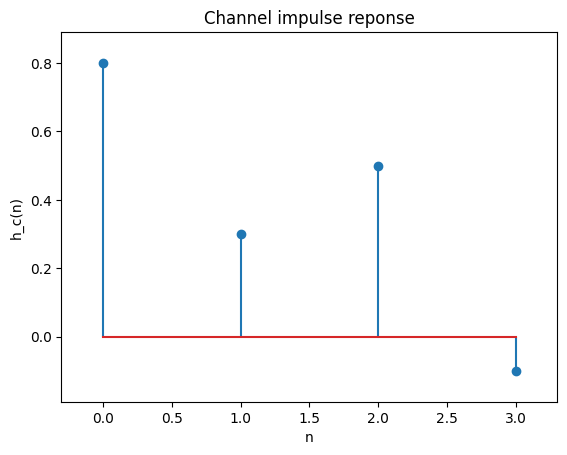

In [5]:
h_c = np.array([0.8,0.3, 0.5, -0.1])

plt.stem(h_c ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('h_c(n)'); plt.title('Channel impulse reponse');
plt.show()

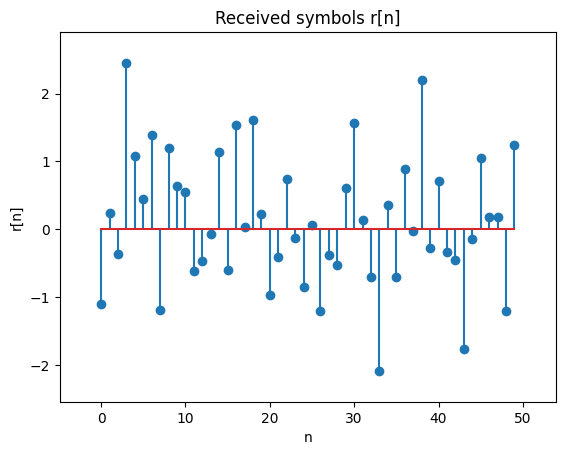

In [6]:
SNR_dB = 8
sigma2 = 10**(-SNR_dB/10)
z = np.sqrt(sigma2) * np.random.randn(s.size + h_c.size - 1)

r = np.convolve(h_c, s) + z

plt.stem(r[:nsym_plot], ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('r[n]'); plt.title('Received symbols r[n]');

#### b) Implement a detector and calculate the symbol error rate `SER`, if *no* equaliser is applied. 

In [7]:
def detector(rx_sym):
    return np.array([1 if sym > 0 else (-1) for sym in rx_sym])

r_det = detector(r[:-h_c.size+1])
SER = sum(np.not_equal(r_det, s)) / r_det.size
print("Symbol error rate is", SER)

Symbol error rate is 0.159


#### c) Equalise the receive signal `r` after Zero-Forcing Equalisation and check the SER. 

*Hint 1*: The equaliser coefficients can be calculated by $e_{ZF} = (H^H H)^{-1} H^H i = H^+ i$, where the upper "H" denotes the hermitian transformation of the matrix. `i` describes the Nyquist condition and, hence, consists of a vector with a `1` at the first place and zeros otherwise. The second form with $H^+$ denotes the pseudo-inverse of $H$.

*Hint 2*: From version 3.5 on, Python allows matrix multiplications with the `@`-operator. The hermitian matrix `A` kann be generated by `A.conj().T`. The matrix inversion `inv` is part of `scipy.linalg`.

In [8]:
len_e = 3 * h_c.size-1  # number of equalizer coefficients
len_h = h_c.size  # length of the channel impulse response
H = lin.toeplitz(np.concatenate((h_c, np.zeros(len_e))), np.concatenate(([h_c[0]], np.zeros(len_e))))
print("Channel matrix H:\n", H)

Channel matrix H:
 [[ 0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.3  0.8  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.5  0.3  0.8  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-0.1  0.5  0.3  0.8  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.1  0.5  0.3  0.8  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -0.1  0.5  0.3  0.8  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.1  0.5  0.3  0.8  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -0.1  0.5  0.3  0.8  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.1  0.5  0.3  0.8  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.1  0.5  0.3  0.8  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -0.1  0.5  0.3  0.8  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -0.1  0.5  0.3  0.8]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.1  0.5  0.3]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.1  0.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -0.1]]


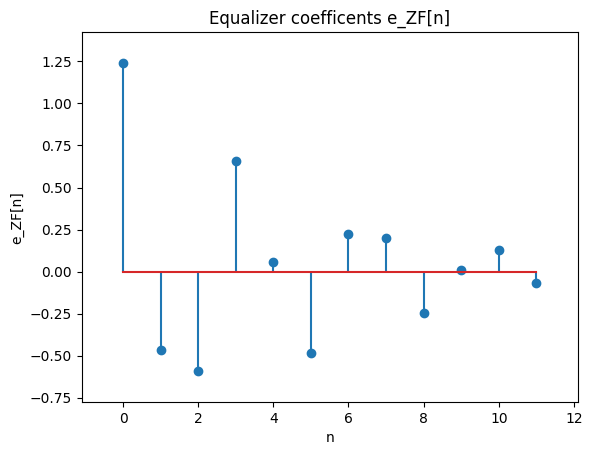

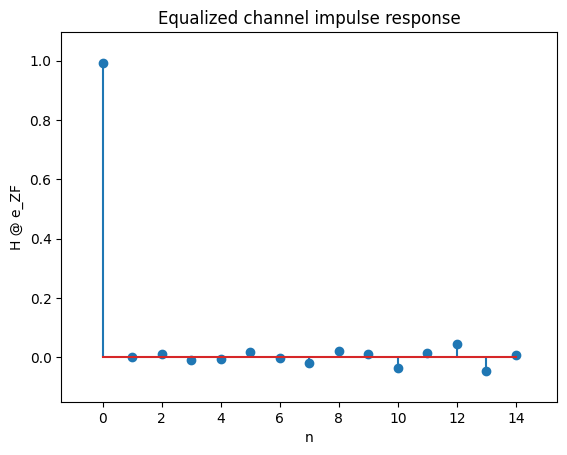

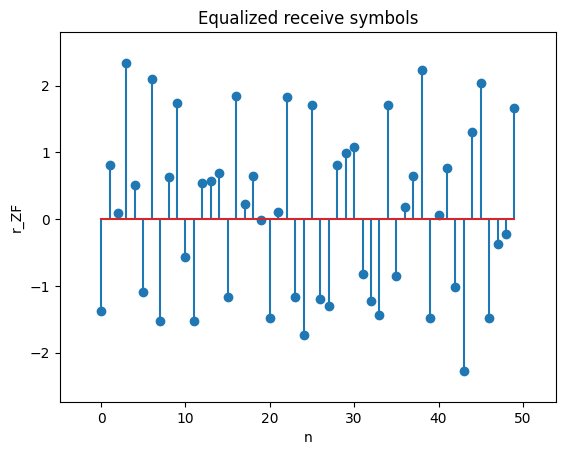

Symbol error rate is 0.079


In [10]:
i = np.zeros(len_h + len_e)
dirac_pos = 0#len_e//2;
i[dirac_pos] = 1
e_ZF = (lin.inv(H.conj().T @ H) @ H.conj().T) @ i
# e_ZF = lin.pinv(H) @ i

plt.stem(e_ZF, ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('e_ZF[n]'); plt.title('Equalizer coefficents e_ZF[n]');
plt.show()

plt.stem(H @ e_ZF, ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('H @ e_ZF'); plt.title('Equalized channel impulse response');
plt.show()

r_ZF =  np.convolve(e_ZF, r)
plt.stem(r_ZF[:nsym_plot], ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('r_ZF'); plt.title('Equalized receive symbols');
plt.show()

r_det_ZF = detector(r_ZF[dirac_pos: dirac_pos + s.size])
SER_ZF = sum(np.not_equal(r_det_ZF, s)) / r_det_ZF.size
print("Symbol error rate is", SER_ZF)

#### d) Equalise the receive singal `r` with the MMSE approach and check the SER.

*Hint*: The equaliser coefficients can be calculated as $e_{MMSE} = (H^H H + \sigma_Z^2 I)^{-1} H^H i$ by assuming mean power of the data as 1 and AWGN. `I` denotes the identity matrix.

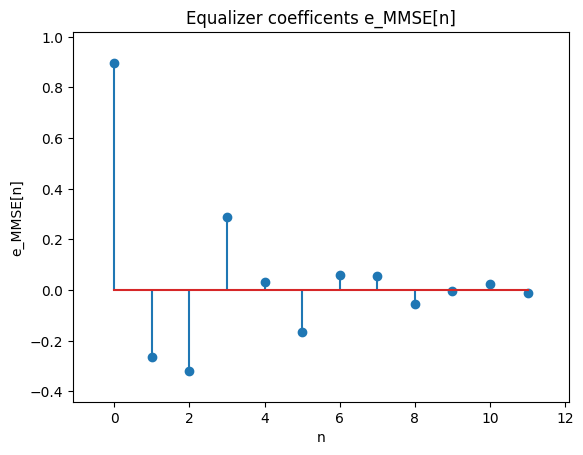

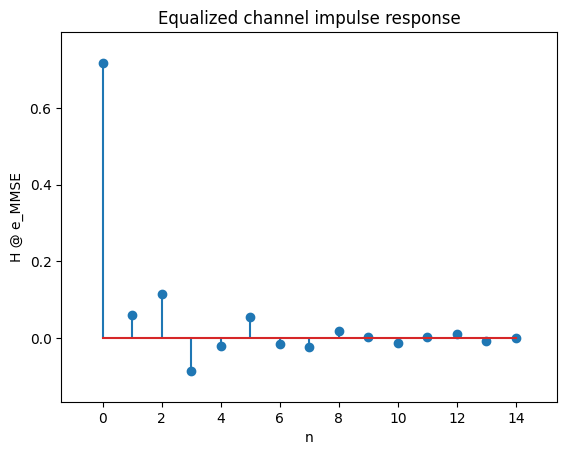

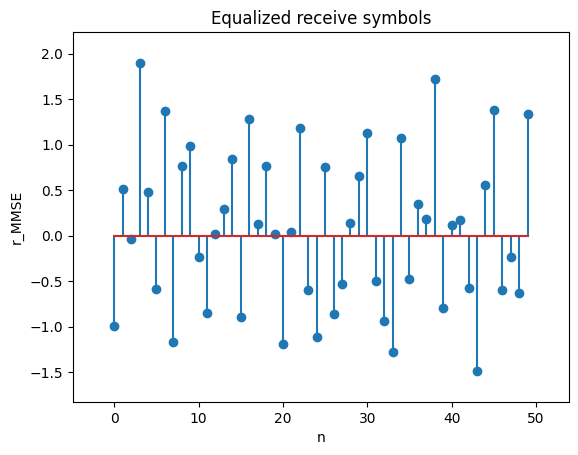

Symbol error rate is 0.07


In [11]:
e_MMSE = (lin.inv(H.conj().T @ H + sigma2 * np.eye(H.shape[1])) @ H.conj().T) @ i

plt.stem(e_MMSE, ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('e_MMSE[n]'); plt.title('Equalizer coefficents e_MMSE[n]');
plt.show()

plt.stem(H @ e_MMSE, ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('H @ e_MMSE'); plt.title('Equalized channel impulse response');
plt.show()

r_MMSE =  np.convolve(e_MMSE, r)
plt.stem(r_MMSE[:nsym_plot], ); plt.margins(0.1); 
plt.xlabel('n'); plt.ylabel('r_MMSE'); plt.title('Equalized receive symbols');
plt.show()

r_det_MMSE = detector(r_MMSE[dirac_pos: dirac_pos + s.size])
SER_MMSE = sum(np.not_equal(r_det_MMSE, s)) / r_det_MMSE.size
print("Symbol error rate is", SER_MMSE)

In [ ]:
plt.semilogy(np.arange(-512, 512)/1024, np.abs(np.fft.fftshift(np.fft.fft(h_c, 1024)))**2, label='h_c')
plt.semilogy(np.arange(-512, 512)/1024, np.abs(np.fft.fftshift(np.fft.fft(e_ZF, 1024)))**2, label='e_ZF')
plt.semilogy(np.arange(-512, 512)/1024, np.abs(np.fft.fftshift(np.fft.fft(e_MMSE, 1024)))**2, label='e_MMSE')
plt.legend(); plt.xlabel('normalized frequency')
plt.title('Frequency responses'); plt.show()

N_ZF = np.sum(np.abs(np.convolve(z, e_ZF))**2)
N_MMSE = np.sum(np.abs(np.convolve(z, e_MMSE))**2)
P_ZF = np.sum(np.abs(np.convolve(np.convolve(e_ZF, h_c), s))**2)
P_MMSE = np.sum(np.abs(np.convolve(np.convolve(e_MMSE, h_c), s))**2)

print('SNR increase for MMSE compared to ZF: ', 10*np.log10((P_MMSE/N_MMSE) / (P_ZF/N_ZF)), 'dB')

#### e) Comprehension Questions
1. Why is the pseudo-inverse used at the Zero-Forcing equaliser? *Answer*: Usually, $H$ is not invertible.
2. In how far does the MMSE resemble the ZF equaliser? *Answer:* For $\text{SNR}\rightarrow\infty$ both are the same.
3. Which additional requirement, besides channel estimation, has the MMSE equaliser? *Answer:* An estimation of the SNR is required.

#### Task 2 - MLSE
Find the most likely sent sequence by direct application of the MLSE algorithm.

#### a) A part of the receive sequence `r` from Task 1 will be observed, so grab the first `K` symbols.

In [ ]:
K = 20  # reduce this number if the simulation takes too long
r = r[:K]
# a[1]; a[5:17]; a[::10]

#### b) Generate all possible combinations of transmit symbols and print their amount. Think about jow this amount can be calculated in general.

In [ ]:
from itertools import product

possible_tx_sequences = list(product(bpsk_map, repeat=K))
num_sequences = bpsk_map.size ** K
print("Number of sequences:", num_sequences)

#### c) Generate the corresponding receives sequence by convolution with the channel impulse response. Limit the convolution to the first `K` symbols.

In [ ]:
possible_rx_sequences = [np.convolve(h_c, tx_seq)[:K] for tx_seq in possible_tx_sequences]

#### d) Calculate the Euclidean distance between the receive vector and the sequences of `possible_rx_sequences`. Then, find the most likely sent sequence by choosing the one with the least distance.

In [ ]:
d = [lin.norm(r - rx_seq)**2 for rx_seq in possible_rx_sequences]
i_min = np.argmin(d)
print("Minimum / average / maximum distance:", d[i_min], np.mean(d), np.max(d))
print("Estimated symbol sequence:", possible_tx_sequences[i_min])
SER_MLSE = sum(np.not_equal(possible_tx_sequences[i_min], s[:K])) / K
print("Symbol error rate is", SER_MLSE)

#### d) Comprehensive questions:
1. Which quantities control the algorithm's complexity and which practical limits are following from this? *Answer:* Since there are $M^K$ ($M$: symbol alphabet's cardinality) possible transmit sequences, the MLSE algorithm is already infeasible for short block lengths.
2. How far do you have to "look back" in order to get optimum results? *Answer:* A naive application of the MLSE algorithm requires consideration of the whole sequence.
3. How could you spare the effort for calculating the Euclidean distances? *Answer:* path weights can be calculated successively and double calculation can be saved up. Further optimisation by Viterbi algorithm.